In [71]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Driver ID is the driver's unique ID

Driver workday ID is the driver's unique ID for that specific workday

Location type id (location type = 1 pickup and 2 = delivery) - Usually, the drivers do all the pickups at the same time in the morning

Location ID is the unique ID for each location

Earliest is the earliest time the stop can be served

Latest is the latest time the stop can be served

Dispatched at is the time we dispatched it to the driver - the ordering of the dispatched at tells which sequence we planned the route to be done in

Arrived at is the time the driver arrived

Completed_at is the time the driver completed the stop

Estimated time on location is the time we had planned them to use on the location

Furthermore, the "dispatched" gives the planned sequence: the last millisecond is increased by one for each visit in the planned sequence.

We can disregard pick-up trips, I think, since all pick-ups tend to happen at the same location (so not very interesting).

In [2]:
dtypes = {'ID': 'int64', 'Day': 'int64', 'Type': 'int64', 'Location': 'int64', 'Earliest': 'datetime64', 'Latest': 'datetime64', 'Dispatched':'datetime64', 'Arrived': 'datetime64', 'Completed':'datetime64', 'Lat':'float64', 'Long':'float64', 'Est.time':'int64'}

data_customers = pd.read_csv('Data_Uni_Molde_V1.csv', sep=';')

In [3]:
data_customers.describe()

,ID,Day,Type,Location,Lat,Long,Est.time
count,253296.000000,253296.000000,253296.000000,253296.000000,253296.000000,253296.000000,253296.000000
mean,1315.604301,331530.327261,1.501382,142646.463896,55.686412,11.881472,34.202964
std,138.953645,26572.100725,0.499999,21905.004823,0.287343,1.120236,24.022579
min,1173.000000,278449.000000,1.000000,127522.000000,54.571000,8.114000,0.000000
25%,1206.000000,309885.000000,1.000000,129463.000000,55.646000,11.897000,12.000000
50%,1243.000000,335245.000000,2.000000,132992.000000,55.647000,12.154000,30.000000
75%,1443.000000,355590.000000,2.000000,137961.000000,55.768000,12.292000,60.000000
max,1632.000000,378013.000000,2.000000,200954.000000,56.660000,15.151000,248.000000


In [7]:
unique_values_ID = data_customers['ID'].value_counts()
print("Unique values in the row:", unique_values_ID)

Unique values in the row: ID
1183    5086
1174    3693
1232    3640
1443    3382
1215    3308
        ... 
1607       2
1561       2
1582       2
1580       2
1611       2
Name: count, Length: 208, dtype: int64


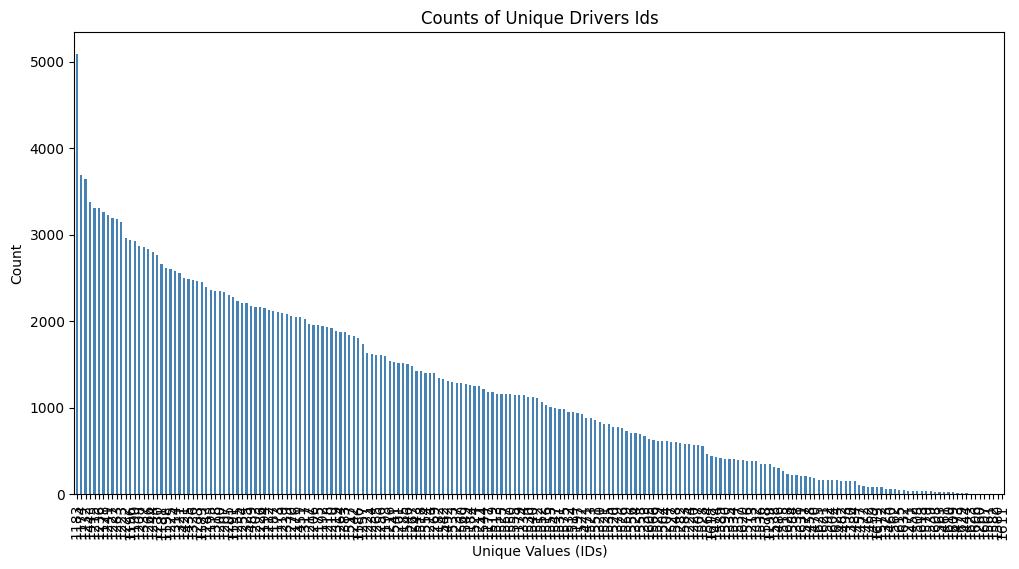

In [8]:
plt.figure(figsize=(12, 6))
unique_values_ID.plot(kind='bar', color='steelblue', figsize=(12, 6))
plt.xlabel('Unique Values (IDs)')
plt.ylabel('Count')
plt.title('Counts of Unique Drivers Ids')
plt.xticks(rotation=90)
plt.show()

In [9]:
driver_rare_visit = data_customers[data_customers['ID'] == 1607]
print(driver_rare_visit)

          ID     Day  Type  Location                Earliest  \
127928  1607  355774     1    185982  2024-03-22 07:00:00+00   
128469  1607  355774     2    189639  2024-03-22 07:00:00+00   

                        Latest                     Dispatched  \
127928  2024-03-22 15:00:00+00  2024-03-22 07:42:58.807716+00   
128469  2024-03-22 15:00:00+00  2024-03-22 07:42:58.810418+00   

                              Arrived                      Completed     Lat  \
127928  2024-03-22 07:45:12.408646+00   2024-03-22 07:47:04.91379+00  56.126   
128469  2024-03-22 07:47:58.185528+00  2024-03-22 07:55:17.433219+00  56.569   

         Long  Est.time  
127928  8.934         8  
128469  8.873        25  


In [10]:
unique_values_day = data_customers['Day'].value_counts()
print("Unique values in the row:", unique_values_day)

Unique values in the row: Day
343474    114
334501     86
353367     78
353242     76
368341     74
         ... 
355816      2
317206      2
278467      1
278449      1
278453      1
Name: count, Length: 8768, dtype: int64


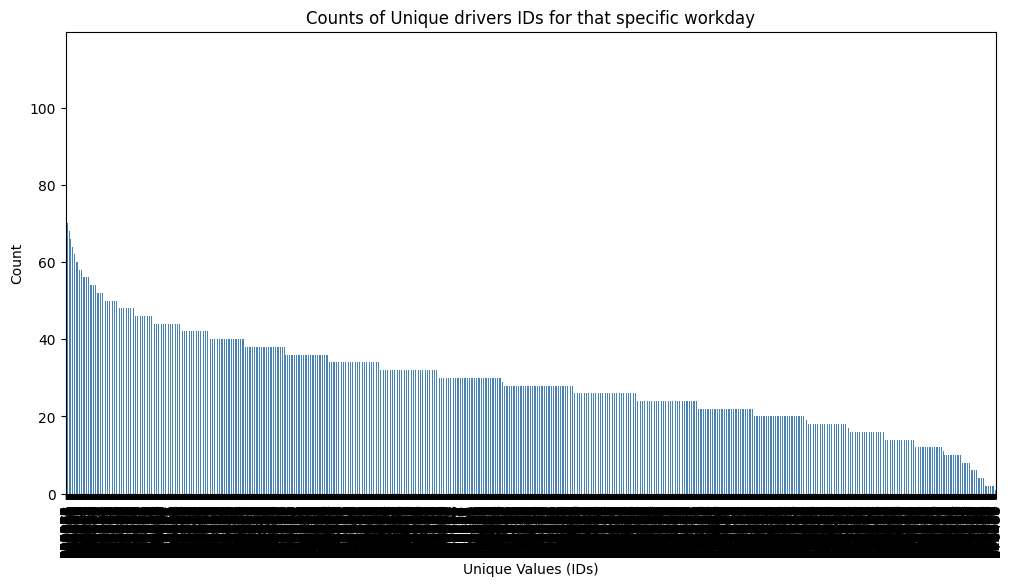

In [11]:
plt.figure(figsize=(12, 6))
unique_values_day.plot(kind='bar', color='steelblue', figsize=(12, 6))
plt.xlabel('Unique Values (IDs)')
plt.ylabel('Count')
plt.title('Counts of Unique drivers IDs for that specific workday')
plt.xticks(rotation=90)
plt.show()

In [12]:
driver_rare_visit_day = data_customers[data_customers['Day'] == 278467]
print(driver_rare_visit_day)

         ID     Day  Type  Location                Earliest  \
12241  1195  278467     2    128403  2023-12-01 01:00:00+00   

                       Latest                     Dispatched  \
12241  2023-12-01 04:00:00+00  2023-11-30 20:15:19.291493+00   

                             Arrived                     Completed     Lat  \
12241  2023-12-01 01:56:00.974939+00  2023-12-01 01:56:42.42514+00  55.666   

         Long  Est.time  
12241  12.349         1  


In [13]:
a = data_customers[data_customers['Location'] == 128403]['Type'] == 1 #

In [14]:
a

2555      False
5824      False
7598      False
10094     False
12241     False
          ...  
231962    False
234957    False
239466    False
246459    False
250761    False
Name: Type, Length: 90, dtype: bool

In [15]:
data_customers.iloc[44639]

ID                                     1193
Day                                  291324
Type                                      1
Location                             128403
Earliest             2023-12-20 07:00:00+00
Latest               2023-12-20 15:00:00+00
Dispatched    2023-12-20 10:48:26.644525+00
Arrived       2023-12-20 11:35:22.167996+00
Completed     2023-12-20 11:35:30.852073+00
Lat                                  55.666
Long                                 12.349
Est.time                                  1
Name: 44639, dtype: object

In [16]:
pickups = data_customers[data_customers['Type']==1]
unique_values_pickups = pickups['Location'].value_counts()

print(unique_values_pickups)

Location
132992    95122
183410    22616
137961     5533
128198      113
146832       90
          ...  
186061        1
186319        1
189869        1
163969        1
186948        1
Name: count, Length: 1076, dtype: int64


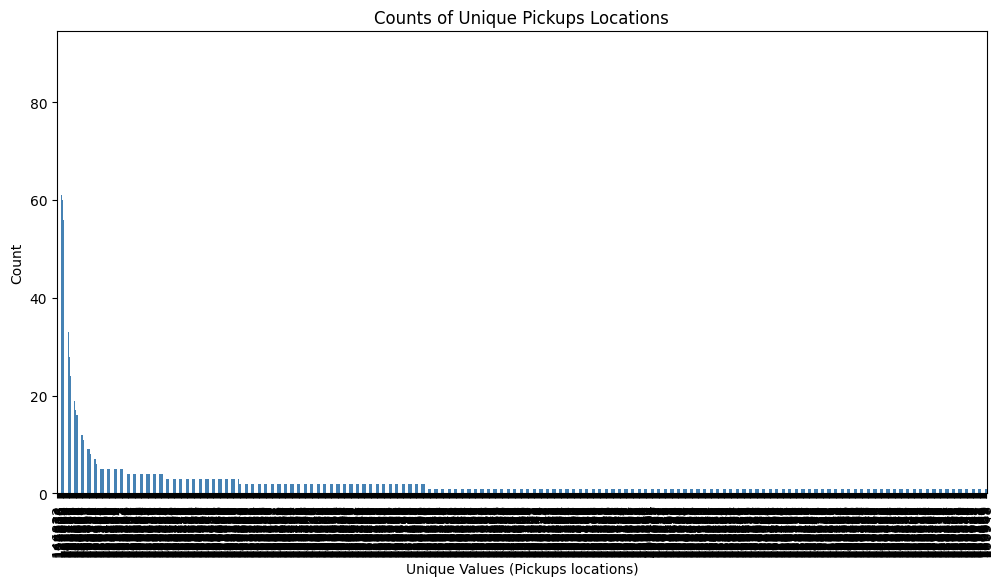

In [17]:
plt.figure(figsize=(12, 6))
unique_values_pickups[4:].plot(kind='bar', color='steelblue', figsize=(12, 6))
plt.xlabel('Unique Values (Pickups locations)')
plt.ylabel('Count')
plt.title('Counts of Unique Pickups Locations')
plt.xticks(rotation=90)
plt.show()

# Alysis of locations

In [26]:
data_customers_deliver_with_na = data_customers[data_customers['Type']==2]
locations_unique = data_customers_deliver_with_na['Location'].value_counts()
locations_unique.head()locations_unique

Location
132992    1722
127830     773
128234     624
128494     608
183410     596
Name: count, dtype: int64

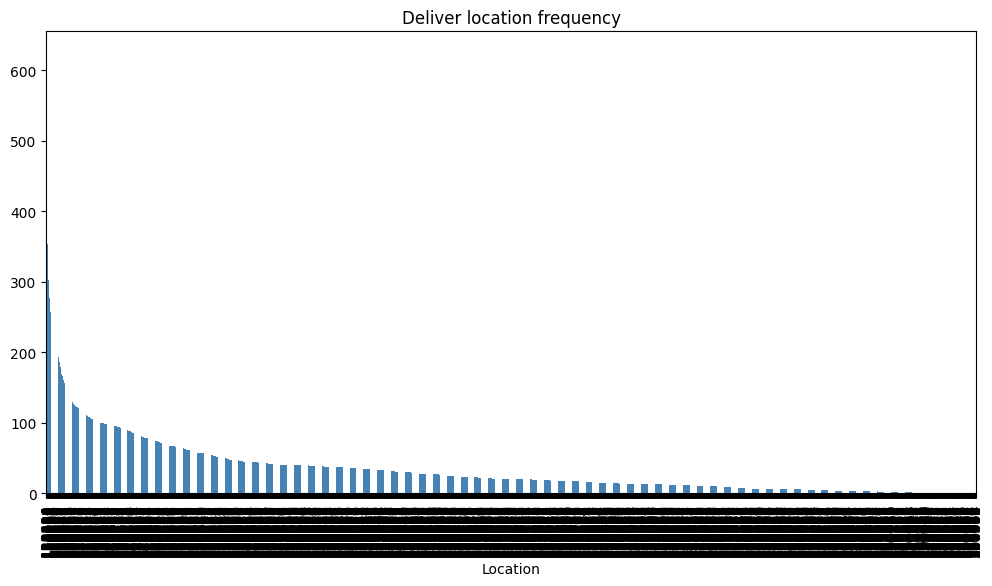

In [25]:
plt.figure(figsize=(12, 6))
locations_unique[2:].plot(kind='bar', color='steelblue', figsize=(12, 6))
plt.title('Deliver location frequency')
plt.xticks(rotation=90)
plt.show()

## Timestep add UNIX timestamp for each column

In [27]:
print(data_customers.isnull().any(axis=1).sum())
print(data_customers.isnull().sum())

66
ID             0
Day            0
Type           0
Location       0
Earliest       0
Latest         0
Dispatched     0
Arrived       66
Completed     43
Lat            0
Long           0
Est.time       0
dtype: int64


In [28]:
def add_ms_column(df, input_col):
    df[f'{input_col}_unixtime_mcs'] = pd.to_datetime(data_customers_no_na[input_col], format='mixed').apply(lambda x: int(x.timestamp() * 1000000))
    return df

data_customers_no_na = data_customers.dropna().reset_index(drop=True)
date_cols = ['Earliest', 'Latest', 'Dispatched', 'Arrived', 'Completed']
for col in date_cols:
    add_ms_column(data_customers_no_na, col)
data_customers_no_na.head()

,ID,Day,Type,Location,Earliest,Latest,Dispatched,Arrived,Completed,Lat,Long,Est.time,Earliest_unixtime_mcs,Latest_unixtime_mcs,Dispatched_unixtime_mcs,Arrived_unixtime_mcs,Completed_unixtime_mcs
0,1212,285443,1,132992,2023-12-11 00:00:00+00,2023-12-11 22:00:00+00,2023-12-10 23:21:54.201442+00,2023-12-11 05:12:11.078133+00,2023-12-11 05:12:37.364426+00,55.647,12.152,60,1702252800000000,1702332000000000,1702250514201442,1702271531078133,1702271557364426
1,1221,352461,1,132992,2024-04-01 18:00:00+00,2024-04-02 00:00:00+00,2024-04-01 20:13:06.402122+00,2024-04-01 22:07:43.124395+00,2024-04-01 22:07:51.048175+00,55.646,12.154,60,1711994400000000,1712016000000000,1712002386402122,1712009263124395,1712009271048175
2,1221,352461,1,132992,2024-04-01 18:00:00+00,2024-04-02 00:00:00+00,2024-04-01 20:13:06.402125+00,2024-04-01 22:07:43.424795+00,2024-04-01 22:07:51.063316+00,55.646,12.154,60,1711994400000000,1712016000000000,1712002386402125,1712009263424795,1712009271063316
3,1221,352461,1,132992,2024-04-01 18:00:00+00,2024-04-02 00:00:00+00,2024-04-01 20:13:06.402127+00,2024-04-01 22:07:43.62662+00,2024-04-01 22:07:51.07029+00,55.646,12.154,60,1711994400000000,1712016000000000,1712002386402127,1712009263626620,1712009271070290
4,1221,352461,1,132992,2024-04-01 18:00:00+00,2024-04-02 00:00:00+00,2024-04-01 20:13:06.40213+00,2024-04-01 22:07:43.965086+00,2024-04-01 22:07:51.080483+00,55.646,12.154,60,1711994400000000,1712016000000000,1712002386402130,1712009263965086,1712009271080483


### Take only deliveries and remove pickups

In [29]:
data_customers_deliver = data_customers_no_na[data_customers_no_na['Type']==2]
print(len(data_customers_deliver))
data_customers_deliver.head()

126935


,ID,Day,Type,Location,Earliest,Latest,Dispatched,Arrived,Completed,Lat,Long,Est.time,Earliest_unixtime_mcs,Latest_unixtime_mcs,Dispatched_unixtime_mcs,Arrived_unixtime_mcs,Completed_unixtime_mcs
6,1232,289871,2,128345,2023-12-18 05:00:00+00,2023-12-18 06:00:00+00,2023-12-17 23:48:03.462019+00,2023-12-18 05:29:43.750528+00,2023-12-18 05:30:08.553793+00,55.628,12.079,32,1702875600000000,1702879200000000,1702856883462019,1702877383750528,1702877408553793
10,1339,289848,2,129750,2023-12-18 05:00:00+00,2023-12-18 07:00:00+00,2023-12-17 23:21:51.293398+00,2023-12-18 05:32:50.563665+00,2023-12-18 05:33:22.442108+00,55.679,11.112,5,1702875600000000,1702882800000000,1702855311293398,1702877570563665,1702877602442108
11,1525,346752,2,183410,2024-03-18 01:00:00+00,2024-03-18 17:00:00+00,2024-03-17 23:14:38.981215+00,2024-03-18 20:40:15.334418+00,2024-03-18 20:40:15.334418+00,56.067,9.987,8,1710723600000000,1710781200000000,1710717278981215,1710794415334418,1710794415334418
12,1187,349463,2,127642,2024-03-27 04:30:00+00,2024-03-27 07:00:00+00,2024-03-26 23:50:28.104047+00,2024-03-27 05:51:23.379448+00,2024-03-27 06:04:14.374534+00,55.403,11.355,22,1711513800000000,1711522800000000,1711497028104047,1711518683379448,1711519454374534
13,1216,289877,2,129396,2023-12-18 05:00:00+00,2023-12-18 06:30:00+00,2023-12-17 23:48:09.79234+00,2023-12-18 05:32:33.115501+00,2023-12-18 05:46:18.913101+00,55.457,12.183,11,1702875600000000,1702881000000000,1702856889792340,1702877553115501,1702878378913101


## Arrival/Dispatching in TW

In [30]:
print(sum(data_customers_deliver['Arrived_unixtime_mcs'] > data_customers_deliver['Latest_unixtime_mcs']))
print(sum(data_customers_deliver['Arrived_unixtime_mcs'] < data_customers_deliver['Earliest_unixtime_mcs']))
print(sum(data_customers_deliver['Dispatched_unixtime_mcs'] > data_customers_deliver['Latest_unixtime_mcs']))





17199
17425
2230


In [31]:
# Locations which were violated the most often (Driver arrived TOO LATE)

violated_locations = data_customers_deliver[data_customers_deliver['Arrived_unixtime_mcs'] > data_customers_deliver['Latest_unixtime_mcs']]['Location']
violated_locations.value_counts()



Location
132992    405
128345    114
128922    112
129619    109
129420     97
         ... 
128487      1
128484      1
128926      1
127658      1
189214      1
Name: count, Length: 2342, dtype: int64

## Alysis of dispatched timestep

In [32]:
data_customers_deliver['dispatch_hour'] = data_customers_deliver['Dispatched_unixtime_mcs'].apply(lambda x: datetime.fromtimestamp(x/1000000).hour)
popular_hour = data_customers_deliver['dispatch_hour'].mode()[0]
print(f"The most popular dispatch hour is: {popular_hour}")
dispatch_by_hour = data_customers_deliver['dispatch_hour'].value_counts().sort_index()
print("Dispatch counts by hour:")
print(dispatch_by_hour)

The most popular dispatch hour is: 23
Dispatch counts by hour:
dispatch_hour
0     15424
1      4356
2      6234
3      4435
4      5248
5      4551
6      2783
7      1961
8      1988
9      1665
10     1297
11      608
12      431
13      184
14       61
15        8
16        1
17      320
18      401
19     4307
20     6039
21     5925
22     7750
23    50958
Name: count, dtype: int64


/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_32484/782667746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_customers_deliver['dispatch_hour'] = data_customers_deliver['Dispatched_unixtime_mcs'].apply(lambda x: datetime.fromtimestamp(x/1000000).hour)


In [22]:
data_customers_deliver['day_of_week'] = data_customers_deliver['Dispatched_unixtime_mcs'].apply(lambda x: datetime.fromtimestamp(x/1000000).strftime('%A'))

# Get dispatch counts by day of week
dispatch_by_day = data_customers_deliver['day_of_week'].value_counts()
print("Dispatch counts by day of week:")
print(dispatch_by_day)

Dispatch counts by day of week:
day_of_week
Tuesday      26321
Monday       23844
Thursday     23688
Wednesday    22186
Sunday       16032
Friday       10942
Saturday      3922
Name: count, dtype: int64


/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_36079/3838144233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_customers_deliver['day_of_week'] = data_customers_deliver['Dispatched_unixtime_mcs'].apply(lambda x: datetime.fromtimestamp(x/1000000).strftime('%A'))


In [23]:
sorted_dispatched = data_customers_deliver.sort_values(by='Dispatched_unixtime_mcs', ascending=True)
print(sorted_dispatched.iloc[0], sorted_dispatched.iloc[-1])

ID                                                  1195
Day                                               278467
Type                                                   2
Location                                          128403
Earliest                          2023-12-01 01:00:00+00
Latest                            2023-12-01 04:00:00+00
Dispatched                 2023-11-30 20:15:19.291493+00
Arrived                    2023-12-01 01:56:00.974939+00
Completed                   2023-12-01 01:56:42.42514+00
Lat                                               55.666
Long                                              12.349
Est.time                                               1
Earliest_unixtime_mcs                   1701392400000000
Latest_unixtime_mcs                     1701403200000000
Dispatched_unixtime_mcs                 1701375319291493
Arrived_unixtime_mcs                    1701395760974939
Completed_unixtime_mcs                  1701395802425140
dispatch_hour                  

In [82]:
data_stops = pd.read_csv('uni_molde_v2.csv', sep=',')

def add_ms_column(df, input_col):
    df[f'{input_col}_unixtime_mcs'] = pd.to_datetime(data_stops_no_na[input_col], format='mixed').apply(lambda x: int(x.timestamp() * 1000000))
    return df

data_stops_no_na = data_stops.dropna().reset_index(drop=True)
date_cols = ['stop_earliest', 'stop_latest', 'stop_dispatched_at', 'stop_arrived_at']
for col in date_cols:
    add_ms_column(data_stops_no_na, col)


sorted_data_stops = data_stops_no_na.sort_values(by='stop_dispatched_at_unixtime_mcs', ascending=True)

grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'location_id', 'stop_dispatched_at', 'stop_dispatched_at_unixtime_mcs', 'stop_arrived_at_unixtime_mcs', 'stop_arrived_at', 'stop_earliest', 'stop_latest']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'location_id': x['location_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_dispatched_at_unixtime_mcs': x['stop_dispatched_at_unixtime_mcs'].tolist(),
    'stop_arrived_at_unixtime_mcs': x['stop_arrived_at_unixtime_mcs'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
})).reset_index()

In [24]:
print(sorted_dispatched.head())

         ID     Day  Type  Location                Earliest  \
12238  1195  278467     2    128403  2023-12-01 01:00:00+00   
11178  1192  278476     2    127653  2023-12-01 02:00:00+00   
6374   1192  278476     2    127865  2023-12-01 03:00:00+00   
12632  1192  278476     2    127865  2023-12-01 03:00:00+00   
14634  1176  278449     2    127616  2023-12-01 02:00:00+00   

                       Latest                     Dispatched  \
12238  2023-12-01 04:00:00+00  2023-11-30 20:15:19.291493+00   
11178  2023-12-01 11:00:00+00  2023-11-30 20:16:48.276728+00   
6374   2023-12-01 05:00:00+00  2023-11-30 20:16:48.276729+00   
12632  2023-12-01 05:00:00+00   2023-11-30 20:16:48.27673+00   
14634  2023-12-01 05:00:00+00  2023-11-30 20:19:32.994033+00   

                             Arrived                      Completed     Lat  \
12238  2023-12-01 01:56:00.974939+00   2023-12-01 01:56:42.42514+00  55.666   
11178  2023-12-01 01:04:54.906606+00  2023-12-01 01:21:59.625561+00  55.639   

In [25]:
grouped_df = sorted_dispatched.groupby('Day')[['ID', 'Type', 'Location', 'Dispatched', 'Dispatched_unixtime_mcs', 'Arrived_unixtime_mcs', 'Arrived', 'Earliest', 'Latest']].apply(lambda x: pd.Series({
    'ID': x['ID'].tolist(),
    'Type': x['Type'].tolist(),
    'Location': x['Location'].tolist(),
    'Dispatched': x['Dispatched'].tolist(),
    'Dispatched_unixtime_mcs': x['Dispatched_unixtime_mcs'].tolist(),
    'Arrived_unixtime_mcs': x['Arrived_unixtime_mcs'].tolist(),
    'Arrived': x['Arrived'].tolist(),
    'Earliest': x['Earliest'].tolist(),
    'Latest': x['Latest'].tolist(),
})).reset_index()


In [32]:
grouped_df.head(30)

,Day,ID,Type,Location,Dispatched,Dispatched_unixtime_mcs,Arrived_unixtime_mcs,Arrived,Earliest,Latest
0,278449,[1176],[2],[127616],[2023-11-30 20:19:32.994033+00],[1701375572994033],[1701396690094320],[2023-12-01 02:11:30.09432+00],[2023-12-01 02:00:00+00],[2023-12-01 05:00:00+00]
1,278453,[1179],[2],[127937],[2023-11-30 20:24:29.651524+00],[1701375869651524],[1701400276483182],[2023-12-01 03:11:16.483182+00],[2023-12-01 02:00:00+00],[2023-12-01 04:00:00+00]
2,278456,"[1182, 1182, 1182]","[2, 2, 2]","[130250, 127533, 127533]","[2023-11-30 20:25:16.541605+00, 2023-11-30 20:...","[1701375916541605, 1701375916541608, 170137591...","[1701397282836218, 1701398809088564, 170139880...","[2023-12-01 02:21:22.836218+00, 2023-12-01 02:...","[2023-12-01 02:00:00+00, 2023-12-01 02:00:00+0...","[2023-12-01 05:00:00+00, 2023-12-01 04:00:00+0..."
3,278467,[1195],[2],[128403],[2023-11-30 20:15:19.291493+00],[1701375319291493],[1701395760974939],[2023-12-01 01:56:00.974939+00],[2023-12-01 01:00:00+00],[2023-12-01 04:00:00+00]
4,278476,"[1192, 1192, 1192]","[2, 2, 2]","[127653, 127865, 127865]","[2023-11-30 20:16:48.276728+00, 2023-11-30 20:...","[1701375408276728, 1701375408276729, 170137540...","[1701392694906606, 1701400663417909, 170140066...","[2023-12-01 01:04:54.906606+00, 2023-12-01 03:...","[2023-12-01 02:00:00+00, 2023-12-01 03:00:00+0...","[2023-12-01 11:00:00+00, 2023-12-01 05:00:00+0..."
5,278483,"[1198, 1198, 1198, 1198, 1198, 1198]","[2, 2, 2, 2, 2, 2]","[128475, 128206, 128203, 128203, 129785, 129785]","[2023-12-01 04:44:14.277823+00, 2023-12-01 04:...","[1701405854277823, 1701405854277824, 170140585...","[1701411875531065, 1701411573638628, 170140947...","[2023-12-01 06:24:35.531065+00, 2023-12-01 06:...","[2023-12-01 06:00:00+00, 2023-12-01 06:00:00+0...","[2023-12-01 08:00:00+00, 2023-12-01 08:00:00+0..."
6,278484,"[1210, 1210, 1210]","[2, 2, 2]","[128013, 128014, 127687]","[2023-11-30 20:22:11.235406+00, 2023-11-30 20:...","[1701375731235406, 1701375731235407, 170138825...","[1701396104559787, 1701395679589962, 170139476...","[2023-12-01 02:01:44.559787+00, 2023-12-01 01:...","[2023-12-01 02:00:00+00, 2023-12-01 02:00:00+0...","[2023-12-01 04:00:00+00, 2023-12-01 04:00:00+0..."
7,278489,"[1211, 1211, 1211]","[2, 2, 2]","[146880, 153283, 128282]","[2023-11-30 22:52:41.783142+00, 2023-11-30 22:...","[1701384761783142, 1701384761783143, 170138476...","[1701407565287143, 1701401286506047, 170141038...","[2023-12-01 05:12:45.287143+00, 2023-12-01 03:...","[2023-12-01 05:30:00+00, 2023-12-01 04:30:00+0...","[2023-12-01 07:00:00+00, 2023-12-01 08:00:00+0..."
8,278511,"[1222, 1222, 1222, 1222, 1222, 1222, 1222, 122...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[128255, 127858, 127858, 128809, 128811, 12816...","[2023-11-30 20:37:12.910069+00, 2023-12-01 04:...","[1701376632910069, 1701406294580165, 170140629...","[1701393092852833, 1701409058459426, 170140905...","[2023-12-01 01:11:32.852833+00, 2023-12-01 05:...","[2023-12-01 02:00:00+00, 2023-12-01 04:30:00+0...","[2023-12-01 05:00:00+00, 2023-12-01 05:30:00+0..."
9,279084,"[1173, 1173, 1173, 1173, 1173, 1173, 1173, 117...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[129094, 127620, 127753, 127902, 127902, 12920...","[2023-11-30 23:17:24.066631+00, 2023-11-30 23:...","[1701386244066631, 1701386244066632, 170138624...","[1701406176269321, 1701405037649323, 170140716...","[2023-12-01 04:49:36.269321+00, 2023-12-01 04:...","[2023-12-01 03:00:00+00, 2023-12-01 03:00:00+0...","[2023-12-01 05:00:00+00, 2023-12-01 06:00:00+0..."


In [26]:
grouped_df.iloc[26]['Arrived'] # for dataset with pickup it was interesting rows with index 12 and 26

['2023-12-01 05:43:27.343853+00',
 '2023-12-01 06:00:53.054031+00',
 '2023-12-01 06:25:51.223282+00',
 '2023-12-01 06:11:47.853593+00',
 '2023-12-01 06:25:51.321329+00',
 '2023-12-01 07:47:28.174005+00',
 '2023-12-01 08:53:33.78975+00',
 '2023-12-01 08:01:26.07726+00',
 '2023-12-01 07:17:08.859471+00',
 '2023-12-01 09:10:21.018093+00',
 '2023-12-01 08:15:10.42788+00',
 '2023-12-01 08:27:33.772184+00',
 '2023-12-01 08:23:08.210388+00',
 '2023-12-01 09:40:11.076357+00',
 '2023-12-01 07:17:26.201369+00',
 '2023-12-01 10:08:29.405123+00',
 '2023-12-01 09:28:36.721061+00',
 '2023-12-01 09:28:48.654505+00',
 '2023-12-01 07:39:32.843543+00',
 '2023-12-01 09:05:05.392418+00',
 '2023-12-01 07:18:03.172629+00']

In [27]:
len_routes = grouped_df['Location'].apply(lambda x: len(x))

In [69]:
#check if drivers id are the same in one route
for i in grouped_df['ID']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')

for index, i in enumerate(grouped_df['Arrived_unixtime_mcs']):
    if not all(datetime.fromtimestamp(x/1000000).date() == datetime.fromtimestamp(i[0]/1000000).date() for x in i):
            print(f"Not the same date in the route {grouped_df.iloc[index]['Arrived']}, {grouped_df.iloc[index]['Dispatched']}, {grouped_df.iloc[index]['ID']},  {grouped_df.iloc[index]['Day']}, {grouped_df.iloc[index]['Location']}, {grouped_df.iloc[index]['Earliest']}, {grouped_df.iloc[index]['Latest']}")
        print('route', grouped_df.iloc[index]['Day'])


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [30]:
for index, i in enumerate(grouped_df['Dispatched_unixtime_mcs']):
    if not all(datetime.fromtimestamp(x/1000000).date() == datetime.fromtimestamp(i[0]/1000000).date() for x in i):
            print(f"Not the same date in the route {grouped_df.iloc[index]['Arrived']}, {grouped_df.iloc[index]['Dispatched']}, {grouped_df.iloc[index]['ID']},  {grouped_df.iloc[index]['Day']}, {grouped_df.iloc[index]['Location']}, {grouped_df.iloc[index]['Earliest']}, {grouped_df.iloc[index]['Latest']}")
            break

Not the same date in the route ['2023-12-01 01:11:32.852833+00', '2023-12-01 05:37:38.459426+00', '2023-12-01 05:37:38.526244+00', '2023-12-01 06:14:58.881831+00', '2023-12-01 06:06:49.822285+00', '2023-12-01 07:06:18.455863+00', '2023-12-01 07:06:18.544059+00', '2023-12-01 07:39:16.177125+00', '2023-12-01 08:05:37.717305+00', '2023-12-01 08:28:31.687901+00'], ['2023-11-30 20:37:12.910069+00', '2023-12-01 04:51:34.580165+00', '2023-12-01 04:51:34.580166+00', '2023-12-01 04:51:34.580167+00', '2023-12-01 04:51:34.580168+00', '2023-12-01 04:51:34.580169+00', '2023-12-01 04:51:34.58017+00', '2023-12-01 04:51:34.580171+00', '2023-12-01 04:51:34.580172+00', '2023-12-01 04:51:34.580173+00'], [1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222],  278511, [128255, 127858, 127858, 128809, 128811, 128169, 128169, 130199, 127887, 128322], ['2023-12-01 02:00:00+00', '2023-12-01 04:30:00+00', '2023-12-01 04:30:00+00', '2023-12-01 05:00:00+00', '2023-12-01 05:00:00+00', '2023-12-01 06:00:00+0

# Generate planned routes

In [70]:
## Dispatched during 30 minutes for one Day group (one driver)

df_routes_30mins = pd.DataFrame(columns=['Day', 'Location', 'Dispatched', 'Arrived'])
for index, row in grouped_df.iterrows():
    dispatched_list = row['Dispatched_unixtime_mcs']
    k = 0
    for i in range(len(dispatched_list) - 1):
        if (datetime.fromtimestamp(dispatched_list[i+1]/1000000) - datetime.fromtimestamp(dispatched_list[i]/1000000) >= timedelta(minutes=30)) :
            df_routes_30mins.loc[len(df_routes_30mins)] = [row['Day'], row['Location'][k: i+1], row['Dispatched'][k: i+1], row['Arrived'][k:i+1]]
            k = (i + 1)
        if (i == len(dispatched_list) - 2):
            df_routes_30mins.loc[len(df_routes_30mins)] = [row['Day'], row['Location'][k: len(dispatched_list)], row['Dispatched'][k: len(dispatched_list)], row['Arrived'][k:len(dispatched_list)]]

In [71]:
df_routes_30mins[df_routes_30mins['Day']==315631]

,Day,Location,Dispatched,Arrived
3864,315631,"[146649, 146730, 146728, 145810]","[2024-01-23 23:46:17.214424+00, 2024-01-23 23:...","[2024-01-24 04:53:36.991821+00, 2024-01-24 04:..."
3865,315631,[127867],[2024-01-24 05:41:42.627371+00],[2024-01-24 06:39:28.572272+00]
3866,315631,"[128794, 128793]","[2024-01-24 08:13:23.240973+00, 2024-01-24 08:...","[2024-01-24 08:22:00.027505+00, 2024-01-24 08:..."
3867,315631,"[127574, 128345, 128795]","[2024-01-24 09:02:27.475766+00, 2024-01-24 09:...","[2024-01-24 09:37:06.528436+00, 2024-01-24 10:..."
3868,315631,"[129562, 129869]","[2024-01-24 10:13:15.880998+00, 2024-01-24 10:...","[2024-01-24 11:48:15.385812+00, 2024-01-24 11:..."


In [79]:
#total routes number
print(len(df_routes_30mins['Location']))

route_length = np.array([len(set(i)) for i in df_routes_30mins['Location']])
unique_values_len, counts_len = np.unique(route_length, return_counts=True)

12011


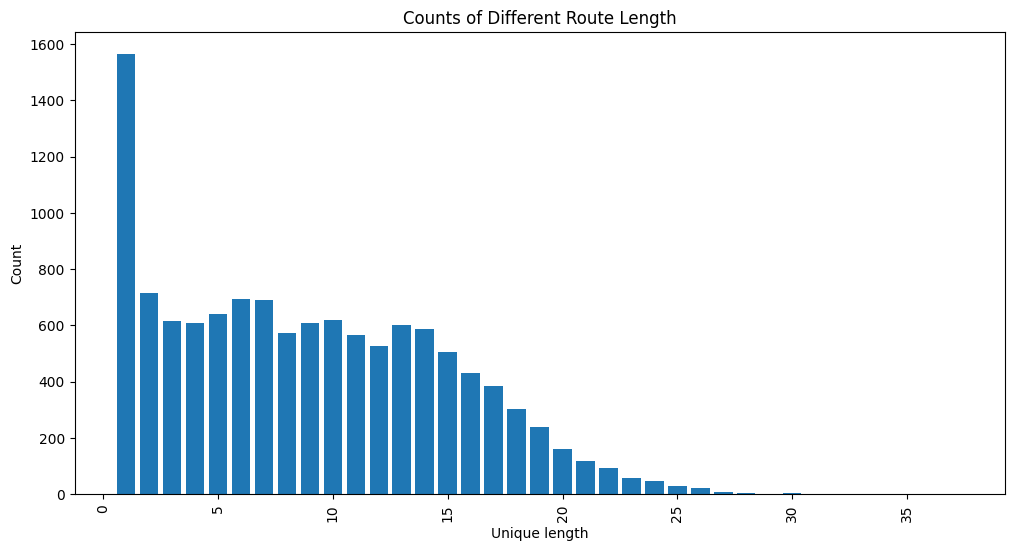

In [84]:
plt.figure(figsize=(12, 6))
plt.bar(unique_values_len, counts_len)
plt.xlabel('Unique length')
plt.ylabel('Count')
plt.title('Counts of Different Route Length')
plt.xticks(rotation=90)
plt.show()

In [85]:
len(route_length[route_length == 1])

1564

# Dataset stops

In [72]:
data_stops = pd.read_csv('uni_molde_v2.csv', sep=',')

In [48]:
data_stops[(data_stops['prev_planned_lat'] != data_stops['prev_actual_lat'])]

,stop_completed_at,stop_arrived_at,stop_latest,stop_earliest,stop_dispatched_at,location_id,location_type_id,driver_workday_id,organization_id,address_id,location_is_depot,driver_id,contact_id,current_lat,current_lng,prev_planned_lat,prev_planned_lng,prev_actual_lat,prev_actual_lng
0,2024-01-01 22:14:54.872731+00,2024-01-01 22:14:16.454324+00,2024-01-02 01:00:00+00,2024-01-01 19:00:00+00,2024-01-01 19:41:35.136881+00,132992,1,297900,182,122267,True,1255,3625252,55.647,12.152,NaN,NaN,NaN,NaN
2,2024-01-02 00:12:47.787753+00,2024-01-01 23:58:12.3139+00,2024-01-02 04:00:00+00,2024-01-01 21:00:00+00,2024-01-01 19:41:35.136897+00,128104,2,297900,182,118854,False,1255,3625252,55.677,12.566,55.667,12.526,55.671,12.561
4,2024-01-01 23:54:40.279695+00,2024-01-01 23:43:54.318108+00,2024-01-02 04:00:00+00,2024-01-01 21:00:00+00,2024-01-01 19:41:35.136899+00,127766,2,297900,182,118623,False,1255,3625252,55.671,12.561,55.676,12.562,55.667,12.526
5,2024-01-02 01:37:25.555839+00,2024-01-02 00:37:53.558145+00,2024-01-02 03:00:00+00,2024-01-01 23:00:00+00,2024-01-01 19:41:35.1369+00,128454,2,297900,182,119091,False,1255,3625252,55.666,12.565,55.671,12.561,55.676,12.562
7,2024-01-02 01:26:11.887629+00,2024-01-02 00:38:02.23853+00,2024-01-02 04:00:00+00,2024-01-01 23:00:00+00,2024-01-01 19:41:35.136902+00,128448,2,297900,182,119089,False,1255,3625252,55.667,12.567,55.669,12.570,55.666,12.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106413,2024-04-29 00:53:55.467648+00,2024-04-29 00:52:14.070398+00,2024-04-29 03:00:00+00,2024-04-28 20:00:00+00,2024-04-28 19:58:06.509988+00,129396,2,378751,182,119741,False,1226,3586431,55.457,12.183,55.453,12.175,55.457,12.179
106414,2024-04-29 00:33:15.760081+00,2024-04-29 00:32:38.268301+00,2024-04-29 04:00:00+00,2024-04-28 22:00:00+00,2024-04-28 19:58:06.509989+00,127851,2,378751,182,118686,False,1226,3586431,55.457,12.179,55.457,12.183,55.453,12.175
106415,2024-04-28 22:03:35.533228+00,2024-04-28 22:00:18.896517+00,2024-04-29 03:00:00+00,2024-04-28 22:00:00+00,2024-04-28 19:58:06.50999+00,130488,2,378751,182,120552,False,1226,3586431,55.614,11.943,55.457,12.179,55.646,12.154
106417,2024-04-29 03:05:47.797423+00,2024-04-29 02:59:39.042438+00,2024-04-29 06:00:00+00,2024-04-28 22:00:00+00,2024-04-28 19:58:06.509994+00,128692,2,378751,182,119250,False,1226,3586431,55.708,12.159,55.603,12.306,55.457,12.183


In [67]:
# data_stops_deliver = data_stops[data_stops['location_type_id'] == 2]
#
# cond1 = data_stops_deliver['prev_planned_lat'] != data_stops_deliver['prev_actual_lat']
# cond2 = data_stops_deliver['prev_planned_lng'] != data_stops_deliver['prev_actual_lng']
#
# intersection = data_stops[cond1 & cond2]


In [56]:
len(data_stops)

106419

In [1]:
#from that notebook
# def add_ms_column(df, input_col):
#     df[f'{input_col}_unixtime_mcs'] = pd.to_datetime(data_stops_no_na[input_col], format='mixed').apply(lambda x: int(x.timestamp() * 1000000))
#     return df

# data_stops_no_na = data_stops.dropna().reset_index(drop=True) ## fulfill with something to not drop all picjups
# date_cols = ['stop_earliest', 'stop_latest', 'stop_dispatched_at', 'stop_arrived_at', 'stop_completed_at']
# for col in date_cols:
#     add_ms_column(data_stops_no_na, col)

In [2]:
#count locations in routes

import matplotlib.pyplot as plt
# Extract values from the dictionary
del location_count[132992]
del location_count[183410]
del location_count[137961]
values = list(location_count.values())
print(values[0:5])
unique_values = sorted(values)
plt.hist(values, bins=unique_values, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# Display the plot
plt.show()

NameError: name 'location_count' is not defined

In [3]:
#graph

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
#
# # Sample array of values
# values = np.array(list(location_count.values()))
#
# # Create density plot
# density = gaussian_kde(values)
# x = np.linspace(values.min(), values.max(), 100)
# plt.plot(x, density(x))
#
# # Show plot
# plt.show()